In [1]:
# import libraries

import torch
import torch.nn as nn
from torchvision import models

from PIL import Image
import matplotlib.pyplot as plt

from torchvision import transforms, datasets, models

import cv2

import albumentations as albu
import segmentation_models_pytorch as smp

import torch
import torch.nn as nn
from torchvision import models
import urllib

import time

In [2]:
path_to_image = 'C:\\Users\\baran.tanriverdi\\Desktop\\researchv3\\.data\\Dropdry\\1DropDry_ph1\\1ABC_6ABC\\1ABC_3ABC\\(1A)Dn2iso.bg60x_21.11.19.jpg'

(3024, 4032, 3)


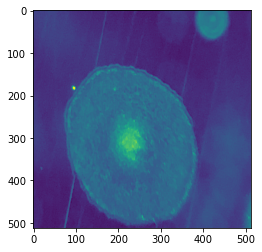

In [3]:
def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')

image = cv2.imread(path_to_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    

#test_transform = albu.PadIfNeeded(384, 480)


"""_pad = transforms.Compose([
        transforms.ToTensor(),
        transforms.Pad(384,480), 
    ])"""

#x = test_transform(image=image)
#x = preprocessing_fn(x['image'])
print(image.shape)
x = cv2.resize(image, (512,512))
x = to_tensor(x)
plt.imshow(x[0])

x_tensor = torch.from_numpy(x).unsqueeze(0)
x_tensor.shape

IMG_SIZE = 512

In [4]:
import torch
UNET = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=512, pretrained=False)

Using cache found in C:\Users\baran.tanriverdi/.cache\torch\hub\mateuszbuda_brain-segmentation-pytorch_master


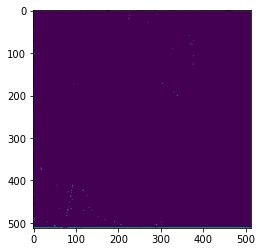

In [6]:
UNET.eval()
y = UNET(x_tensor)
pr_mask = (y.detach().squeeze().numpy().round())

#plt.imshow(yy[0,0].detach().numpy())
plt.imshow(pr_mask)

In [7]:
pr_mask.shape

(512, 512)

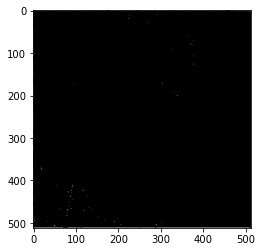

In [8]:
plt.imshow(pr_mask, cmap='gray')